Given a sequence of {F|L|R}, each of which is "move forward one step", "turn left, then move forward one step", "turn right, then move forward one step":
1. which tours are closed?
2. what is the area enclosed by the tour?

In [69]:
import collections
import enum
import random

In [20]:
class Direction(enum.Enum):
    UP = 1
    RIGHT = 2
    DOWN = 3
    LEFT = 4
    
turn_lefts = {Direction.UP: Direction.LEFT, Direction.LEFT: Direction.DOWN,
              Direction.DOWN: Direction.RIGHT, Direction.RIGHT: Direction.UP}

turn_rights = {Direction.UP: Direction.RIGHT, Direction.RIGHT: Direction.DOWN,
               Direction.DOWN: Direction.LEFT, Direction.LEFT: Direction.UP}

def turn_left(d):
    return turn_lefts[d]

def turn_right(d):
    return turn_rights[d]


In [8]:
Step = collections.namedtuple('Step', ['x', 'y', 'dir'])

In [30]:
def advance(step, d):
    if d == Direction.UP:
        return Step(step.x, step.y+1, d)
    elif d == Direction.DOWN:
        return Step(step.x, step.y-1, d)
    elif d == Direction.LEFT:
        return Step(step.x-1, step.y, d)
    elif d == Direction.RIGHT:
        return Step(step.x+1, step.y, d)

In [28]:
def trace_tour(tour):
    current = Step(0, 0, Direction.RIGHT)
    trace = [current]
    for s in tour:
        if s == 'F':
            current = advance(current, current.dir)
        elif s == 'L':
            current = advance(current, turn_left(current.dir))
        elif s == 'R':
            current = advance(current, turn_right(current.dir))
        trace += [current]
    return trace    

In [9]:
k = Step(1, 2, 3)

In [10]:
k

Step(x=1, y=2, dir=3)

In [11]:
Step

__main__.Step

In [22]:
d = Direction.UP
d

<Direction.UP: 1>

In [23]:
turn_right(d)

<Direction.RIGHT: 2>

In [21]:
turn_rights

{<Direction.LEFT: 4>: <Direction.UP: 1>,
 <Direction.UP: 1>: <Direction.RIGHT: 2>,
 <Direction.DOWN: 3>: <Direction.LEFT: 4>,
 <Direction.RIGHT: 2>: <Direction.DOWN: 3>}

In [31]:
trace_tour('FLRL')

[Step(x=0, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=1, dir=<Direction.UP: 1>),
 Step(x=2, y=1, dir=<Direction.RIGHT: 2>),
 Step(x=2, y=2, dir=<Direction.UP: 1>)]

In [33]:
trace_tour('FFLRLLFLRL')

[Step(x=0, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=2, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=2, y=1, dir=<Direction.UP: 1>),
 Step(x=3, y=1, dir=<Direction.RIGHT: 2>),
 Step(x=3, y=2, dir=<Direction.UP: 1>),
 Step(x=2, y=2, dir=<Direction.LEFT: 4>),
 Step(x=1, y=2, dir=<Direction.LEFT: 4>),
 Step(x=1, y=1, dir=<Direction.DOWN: 3>),
 Step(x=0, y=1, dir=<Direction.LEFT: 4>),
 Step(x=0, y=0, dir=<Direction.DOWN: 3>)]

In [34]:
trace_tour('FLLFFLFFFLFFLFLLRRFR')

[Step(x=0, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=1, dir=<Direction.UP: 1>),
 Step(x=0, y=1, dir=<Direction.LEFT: 4>),
 Step(x=-1, y=1, dir=<Direction.LEFT: 4>),
 Step(x=-2, y=1, dir=<Direction.LEFT: 4>),
 Step(x=-2, y=0, dir=<Direction.DOWN: 3>),
 Step(x=-2, y=-1, dir=<Direction.DOWN: 3>),
 Step(x=-2, y=-2, dir=<Direction.DOWN: 3>),
 Step(x=-2, y=-3, dir=<Direction.DOWN: 3>),
 Step(x=-1, y=-3, dir=<Direction.RIGHT: 2>),
 Step(x=0, y=-3, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=-3, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=-2, dir=<Direction.UP: 1>),
 Step(x=1, y=-1, dir=<Direction.UP: 1>),
 Step(x=0, y=-1, dir=<Direction.LEFT: 4>),
 Step(x=0, y=-2, dir=<Direction.DOWN: 3>),
 Step(x=-1, y=-2, dir=<Direction.LEFT: 4>),
 Step(x=-1, y=-1, dir=<Direction.UP: 1>),
 Step(x=-1, y=0, dir=<Direction.UP: 1>),
 Step(x=0, y=0, dir=<Direction.RIGHT: 2>)]

In [35]:
trace_tour('FFRLLFRLLFFFRFLLRLLRRLLRLL')

[Step(x=0, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=2, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=2, y=-1, dir=<Direction.DOWN: 3>),
 Step(x=3, y=-1, dir=<Direction.RIGHT: 2>),
 Step(x=3, y=0, dir=<Direction.UP: 1>),
 Step(x=3, y=1, dir=<Direction.UP: 1>),
 Step(x=4, y=1, dir=<Direction.RIGHT: 2>),
 Step(x=4, y=2, dir=<Direction.UP: 1>),
 Step(x=3, y=2, dir=<Direction.LEFT: 4>),
 Step(x=2, y=2, dir=<Direction.LEFT: 4>),
 Step(x=1, y=2, dir=<Direction.LEFT: 4>),
 Step(x=0, y=2, dir=<Direction.LEFT: 4>),
 Step(x=0, y=3, dir=<Direction.UP: 1>),
 Step(x=0, y=4, dir=<Direction.UP: 1>),
 Step(x=-1, y=4, dir=<Direction.LEFT: 4>),
 Step(x=-1, y=3, dir=<Direction.DOWN: 3>),
 Step(x=-2, y=3, dir=<Direction.LEFT: 4>),
 Step(x=-2, y=2, dir=<Direction.DOWN: 3>),
 Step(x=-1, y=2, dir=<Direction.RIGHT: 2>),
 Step(x=-1, y=1, dir=<Direction.DOWN: 3>),
 Step(x=-2, y=1, dir=<Direction.LEFT: 4>),
 Step(x=-2, y=0, dir=<Direction.DOWN: 3>),
 Step(x=-1, y=0, dir=<Direct

In [112]:
def positions(trace):
    return [(s.x, s.y) for s in trace]

In [113]:
positions(trace_tour('FFRLLFRLLFFFRFLLRLLRRLLRLL'))

[(0, 0),
 (1, 0),
 (2, 0),
 (2, -1),
 (3, -1),
 (3, 0),
 (3, 1),
 (4, 1),
 (4, 2),
 (3, 2),
 (2, 2),
 (1, 2),
 (0, 2),
 (0, 3),
 (0, 4),
 (-1, 4),
 (-1, 3),
 (-2, 3),
 (-2, 2),
 (-1, 2),
 (-1, 1),
 (-2, 1),
 (-2, 0),
 (-1, 0),
 (-1, -1),
 (0, -1),
 (0, 0)]

In [114]:
def valid(trace):
    return (trace[-1].x == 0 
            and trace[-1].y == 0 
            and len(set(positions(trace))) + 1 == len(trace))

In [115]:
valid(trace_tour('FFRLLFRLLFFFRFLLRLLRRLLRLL'))

True

In [116]:
valid(trace_tour('FFRLLFRLLFFFRFLLRLLRRLLRLLFF'))

False

In [117]:
valid(trace_tour('FFLLLFRR'))

False

In [118]:
valid(trace_tour('F'))

False

In [119]:
valid(trace_tour('LLLL'))

True

In [120]:
def chunks(items, n=2):
    return [items[i:i+n] for i in range(len(items) - n + 1)]

In [121]:
import string
chunks(string.ascii_lowercase, 7)

['abcdefg',
 'bcdefgh',
 'cdefghi',
 'defghij',
 'efghijk',
 'fghijkl',
 'ghijklm',
 'hijklmn',
 'ijklmno',
 'jklmnop',
 'klmnopq',
 'lmnopqr',
 'mnopqrs',
 'nopqrst',
 'opqrstu',
 'pqrstuv',
 'qrstuvw',
 'rstuvwx',
 'stuvwxy',
 'tuvwxyz']

Using the [Shoelace formula](https://en.wikipedia.org/wiki/Shoelace_formula)

In [122]:
def shoelace(trace):
    return abs(sum(s.x * t.y - t.x * s.y for s, t in chunks(trace, 2))) // 2

In [123]:
shoelace(trace_tour('FFLRLLFLRL'))

4

In [124]:
shoelace(trace_tour('FLLFFLFFFLFFLFLLRRFR'))

9

In [125]:
shoelace(trace_tour('FFRLLFRLLFFFRFLLRLLRRLLRLL'))

15

In [329]:
def step(s, current):
    if s == 'F':
        return advance(current, current.dir)
    elif s == 'L':
        return advance(current, turn_left(current.dir))
    elif s == 'R':
        return advance(current, turn_right(current.dir))
    else:
        raise ValueError

In [507]:
def valid_prefix(tour):
    current = Step(0, 0, Direction.RIGHT)
    prefix = []
    posns = []
    for s in tour:
        current = step(s, current)
        prefix += [s]
        if (current.x, current.y) in posns:
            return ''
        elif current.x == 0 and current.y == 0: 
            return ''.join(prefix)
        posns += [(current.x, current.y)]
    if current.x == 0 and current.y == 0:
        return ''.join(prefix)
    else:
        return ''

In [552]:
def mistake_positions(tour, debug=False):
    mistakes = []
    current = Step(0, 0, Direction.RIGHT)
    posns = [(0, 0)]
    for i, s in enumerate(tour):
        current = step(s, current)
        if (current.x, current.y) in posns:
            if debug: print(i, current)
            mistakes += [(i+1, current)]
        posns += [(current.x, current.y)]
    if (current.x, current.y) == (0, 0):
        return mistakes[:-1]
    else:
        return mistakes + [(len(tour)+1, current)]

In [550]:
def returns_to_origin(mistake_positions):
    return [i for i, m in mistake_positions
           if (m.x, m.y) == (0, 0)]

In [492]:
sample_tours = ['FFLRLLFLRL', 'FLLFFLFFFLFFLFLLRRFR', 'FFRLLFRLLFFFRFLLRLLRRLLRLL']

In [493]:
valid_prefix(sample_tours[0])

'FFLRLLFLRL'

In [494]:
all(valid_prefix(t) == t for t in sample_tours)

True

In [495]:
valid_prefix(sample_tours[0] + 'FLLLL') == sample_tours[0]

False

In [526]:
mistake_positions(sample_tours[0] + 'F')

9 Step(x=0, y=0, dir=<Direction.DOWN: 3>)


[(10, Step(x=0, y=0, dir=<Direction.DOWN: 3>)),
 (12, Step(x=0, y=-1, dir=<Direction.DOWN: 3>))]

In [527]:
mistake_positions(sample_tours[0] + 'FLLLL')

9 Step(x=0, y=0, dir=<Direction.DOWN: 3>)
12 Step(x=1, y=0, dir=<Direction.UP: 1>)
13 Step(x=0, y=0, dir=<Direction.LEFT: 4>)
14 Step(x=0, y=-1, dir=<Direction.DOWN: 3>)


[(10, Step(x=0, y=0, dir=<Direction.DOWN: 3>)),
 (13, Step(x=1, y=0, dir=<Direction.UP: 1>)),
 (14, Step(x=0, y=0, dir=<Direction.LEFT: 4>)),
 (15, Step(x=0, y=-1, dir=<Direction.DOWN: 3>)),
 (16, Step(x=0, y=-1, dir=<Direction.DOWN: 3>))]

In [528]:
(sample_tours[0] + 'FLLLL')[:10]

'FFLRLLFLRL'

In [375]:
def random_walk(steps=1000):
    return ''.join(random.choice('FLR') for _ in range(steps))

In [548]:
valid_prefix(random_walk(1000))

''

In [342]:
valid_prefix(random_walk(1000), allowed_mistakes=1)

'FLFFLRFRLFRRRR'

In [440]:
walks = []
while len(walks) < 10:
    w = valid_prefix(random_walk())
    if len(w) > 30: walks += [w]

In [441]:
walks

['LFRRFLLRFLRLLRFLRLFLRFLFFFRLLRLL',
 'LRFFLFFFRLLRFRFFLRRFRLFLRFRLFRLRFFFF',
 'FFFLRFRLRLFLRLFLFFFFFRFFRLLFFFLRLFFLRF',
 'LFRLFFFFRLLRFFLLFFFRFFLLRFRLFLRFLF',
 'LFLRRFLLRRFRFLFFRFFFFRRLLRFLRFRRLF',
 'FLRLRLRFRLRFRLLFRFFRRLFRFLFLRRLR',
 'RFRRFFFFRLRFLFRRLRFFFFRRFFLLFFRF',
 'FFLFLRLFRLFFRFFLLFFRLLFRRLLRLFFF',
 'RFFLFRRLRRLRLLFRFRLLRRLRFRLLRRFFRLFFLR',
 'RFLFFLFRLFLRLFLRRLFFLRFLFLFRLLRF']

In [350]:
trace_tour('FLLL')

[Step(x=0, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=1, dir=<Direction.UP: 1>),
 Step(x=0, y=1, dir=<Direction.LEFT: 4>),
 Step(x=0, y=0, dir=<Direction.DOWN: 3>)]

(-1, 3)

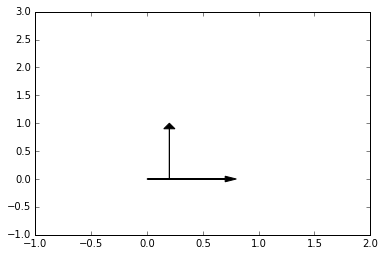

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.axis('on')
plt.arrow(0, 0, 0.8, 0, head_width=0.1, head_length=0.1, fc='k', ec='k', length_includes_head=True)
plt.arrow(0.2, 0, 0, 1, head_width=0.1, head_length=0.1, fc='k', ec='k', length_includes_head=True)
plt.xlim([-1, 2])
plt.ylim([-1, 3])

In [135]:
def bounds(trace):
    return (max(s.x for s in trace),
            max(s.y for s in trace),
            min(s.x for s in trace),
            min(s.y for s in trace))

In [136]:
bounds(trace_tour('RFRFFLRFLFFRRFFRRRRLLLRRRRRRFRLFRFFRFFRRFRLRRFLLFRLLFRFLFLFRFRLLFRLFRFLRRLLFRRRFRRRRLLFLFRFRRFFRRLLLRLRRFRLRRFFRRFLFRRLLRRFFRFRRRRRFLLLLLRRFFFLLFFFRRLFLFFLRRRFRFLLFFRRLLRFLLRRF'))

(0, 2, -13, -13)

In [148]:
plot_wh = {Direction.UP: (0, 1), Direction.LEFT: (-1, 0),
           Direction.DOWN: (0, -1), Direction.RIGHT: (1, 0)}

In [214]:
def plot_trace(trace):
    plt.axis('on')
    plt.axes().set_aspect('equal')
    for s, t in chunks(trace, 2):
        w, h = plot_wh[t.dir]
        plt.arrow(s.x, s.y, w, h, head_width=0.1, head_length=0.1, fc='k', ec='k', length_includes_head=True)
    xh, yh, xl, yl = bounds(trace)
    plt.xlim([xl-1, xh+1])
    plt.ylim([yl-1, yh+1])

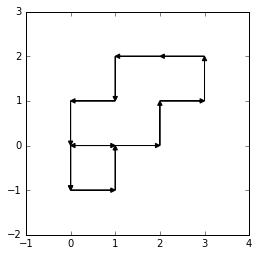

In [514]:
plot_trace(trace_tour(sample_tours[0] + 'FLLLL'))

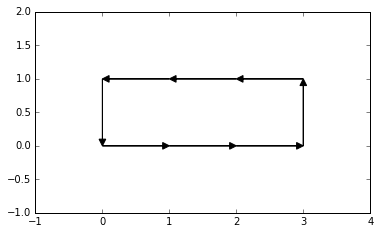

In [215]:
plot_trace(trace_tour('FFFLLFFL'))

In [216]:
trace_tour(walks[3])

[Step(x=0, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=-1, dir=<Direction.DOWN: 3>),
 Step(x=1, y=-2, dir=<Direction.DOWN: 3>),
 Step(x=0, y=-2, dir=<Direction.LEFT: 4>),
 Step(x=-1, y=-2, dir=<Direction.LEFT: 4>),
 Step(x=-1, y=-3, dir=<Direction.DOWN: 3>),
 Step(x=-2, y=-3, dir=<Direction.LEFT: 4>),
 Step(x=-2, y=-2, dir=<Direction.UP: 1>),
 Step(x=-2, y=-1, dir=<Direction.UP: 1>),
 Step(x=-1, y=-1, dir=<Direction.RIGHT: 2>),
 Step(x=-1, y=0, dir=<Direction.UP: 1>),
 Step(x=0, y=0, dir=<Direction.RIGHT: 2>)]

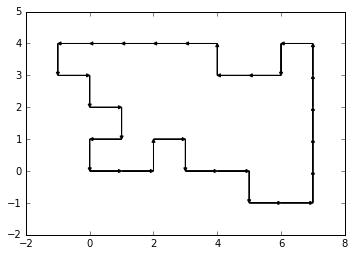

In [405]:
plot_trace(trace_tour(walks[3]))

In [442]:
long_walks = [w for w in walks if len(w) >= 30]
len(long_walks)

10

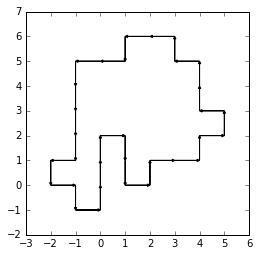

In [443]:
plot_trace(trace_tour(long_walks[0]))

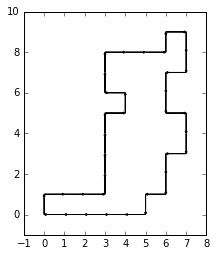

In [444]:
plot_trace(trace_tour(long_walks[1]))

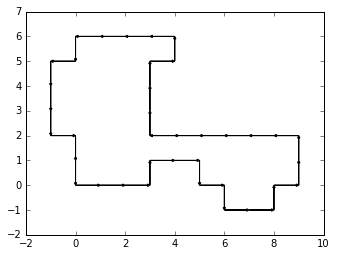

In [445]:
plot_trace(trace_tour(long_walks[2]))

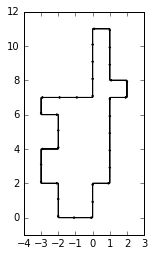

In [446]:
plot_trace(trace_tour(long_walks[3]))

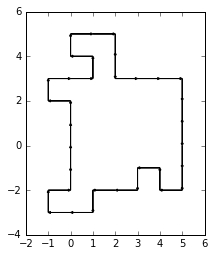

In [447]:
plot_trace(trace_tour(long_walks[4]))

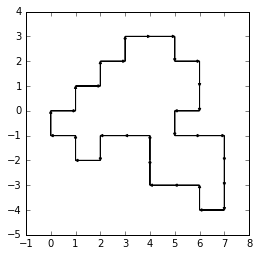

In [448]:
plot_trace(trace_tour(long_walks[5]))

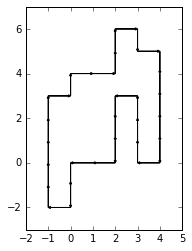

In [449]:
plot_trace(trace_tour(long_walks[6]))

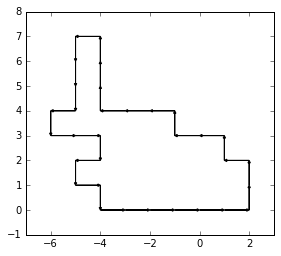

In [450]:
plot_trace(trace_tour(long_walks[7]))

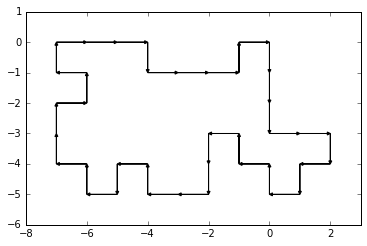

In [451]:
plot_trace(trace_tour(long_walks[8]))

In [416]:
walks

['RFLRFFRFFFFRLRFRFFRLLFFFFFRRLRRL',
 'FFFFRFRLRLFRLRLRFRRLLFFRFRLFLRRFLRRL',
 'RLLRLFFFRFFLLRRLLFRLLRRFLLRRLLFFFFLRFLRF',
 'FFLRRLFRLFLFFFFLLRFRLFFFFLLRLRRL',
 'FLFRFLFRFFFLFRLFRLLFFLRRFLRLLFRLRLRRLLFFFRFLFLRLRL',
 'LRFRLRFLFFFFFRRFLRLRFRLRLFRLFFRRLR',
 'LRFLFLRLRRFLFFRRFFFLFRFFLRFRFLLRFFRRLLRFFRLRRFFLLRLR',
 'LFRLFFFRLLRLLFFRRLLRLFFFLRRLLFFL',
 'FLRFFLFFRLFRLLFRLLFFFRLFRRLFLFFL',
 'LLRFRLRRLRLFRFFFFRLRFFLRFFRLRRLFRFFL']

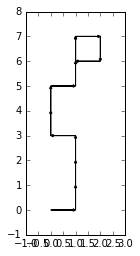

In [452]:
plot_trace(trace_tour('FLFFLRFRLFRRRR'))

In [582]:
w = random_walk()
ms = mistake_positions(w)
len(ms), returns_to_origin(ms)

(408, [8, 16, 20])

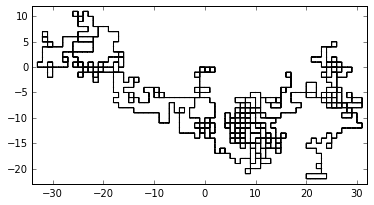

In [583]:
plot_trace(trace_tour(w))

In [488]:
walks_m = {i: list() for i in range(4)}
while all(len(w_m) < 10 for w_m in walks_m.values()):
    w = random_walk()
    ps = mistake_positions(w)
    if not ps or ps[0][0] > 30:
        walks_m[0] += [w[:ps[0][0]]]
    if len(ps) >= 2
        
    if len(w) > 30: 
        walks_m[i] += [w]

In [489]:
walks_m

{0: ['LRLRLRLFRFLFFLRFRRLRLFLLRFLRRLLFFFLRLRLLRLF',
  'FFRLLFFFFRFLRFRLLRFFRFFFFFFLLRRLRRFFR',
  'LFRRFLLRFFLFRLRFLRRLLFRRFLFLRRFFLFFLRFFLFFLFLFRRR',
  'FLFLFFLRRFFFFLFRFFLFRFFLFFRLFRRR',
  'LLFLLRFFRLLFRFLFRLRFFRFFLFFLRLFRLLFLFF',
  'RFRRLRLLRRFLFFRRLRFFFLFRRLFLFLRRR',
  'FFLFFRFLFLRLFFLLFRRFFFRLLFFFRFFRRR',
  'LRRLFRFLRFFFFRLLRLRFLRFLLRRFRLLRFRLFLFLRRR',
  'LRLFLRRFLFRRLRFRFLFLRLLFRRFFRLRFLLFL',
  'RLRRLFLFRRLLFFRFRFLFFLRLFLRLRFLLFRFFFLRRFRFLFFRFLFRLFFRRR'],
 1: ['RRFLRRLLFLRLRRLFRLFFFRLLFRFLFRRLLLL',
  'LRLFFLRRFLLRLRRLLRLRFLRLFFLLLFLRRR',
  'RFRRLFRLRLRRFLLRFLFFLRRFLRRFRRL',
  'FFFRFLFRLFFLFLLLFLFFLRFFRFFFRRLRRLF',
  'FLFRFFRLLRFRLLRFFRFLFLFLRFFFLRRLLLF',
  'FRRLRLLFRFLRFRLRRFRFFFLRFFRLRFFLLFRFLRFFRLFRRLLL',
  'FFLRLRFLFLRRFFLFFRRRFRLFLFRRLLFRFRLLFFLLF',
  'FLRRFLRLFFFFRFLFLLLFFRFLFRLLFRRLLL',
  'RFFFRFLLRFFRFFFRRRFLRLFRFFLRLLFLF',
  'FFRFLFLLRRLRLFFRLFFLFRLFLRFFLLFFLF'],
 2: ['FFLRFRFRLFRFFFFLRFRLRFRLFLLLRLFLRLFLLRLR',
  'FFLFRLLRLRRFFRLFLRFFFFRLFLRFFLLLFRFLFRRLR',
  'RRLFRRFFFLLR

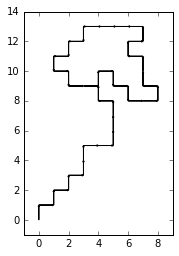

In [490]:
plot_trace(trace_tour(walks_m[0][0]))